### Problem Statement

Build a facial recognition system for my class

### Required Libraries

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Flatten,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt


#### Define the directory path and class labels

In [2]:
directory = "D:\Studies\AI and Decesion Science\photos-data"
class_labels = ["D:\Studies\AI and Decesion Science\photos-data\Abhay", 
                "D:\Studies\AI and Decesion Science\photos-data\Atif",
                "D:\Studies\AI and Decesion Science\photos-data\Bhanu",
                "D:\Studies\AI and Decesion Science\photos-data\Dhwani",
               "D:\Studies\AI and Decesion Science\photos-data\Prasad",
               "D:\Studies\AI and Decesion Science\photos-data\Rahul",
               "D:\Studies\AI and Decesion Science\photos-data\Yugandhar",
               "D:\Studies\AI and Decesion Science\photos-data\Mustafa",
               "D:\Studies\AI and Decesion Science\photos-data\Shivansh",
               "D:\Studies\AI and Decesion Science\photos-data\Salman",
               "D:\Studies\AI and Decesion Science\photos-data\Swaijit",
               "D:\Studies\AI and Decesion Science\photos-data\Hashika"]
num_classes = len(class_labels)


#### Loading the images

In [3]:
#Empty lists to store the images
images = []
labels = []

# Iterate over the folders and images, load the images, and append them to the list
for i, label in enumerate(class_labels):
    folder_path = os.path.join(directory, label)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")  
        image = image.resize((128, 128))
        image = np.array(image)
        images.append(image)
        labels.append(i) 

# Converting lists of images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalizing the image data
images = images / 255.0

#### Shapes of the image data and labels arrays

In [4]:
print("Image data shape:", images.shape)
print("Labels shape:", labels.shape)
print("Unique Labels:", np.unique(labels))

Image data shape: (720, 128, 128, 3)
Labels shape: (720,)
Unique Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Spliting the dataset into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=524)

# Print the shapes of the image data and labels arrays
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (576, 128, 128, 3)
Testing set shape: (144, 128, 128, 3)
Training labels shape: (576,)
Testing labels shape: (144,)


#### Flatten the 128x128 images

In [6]:
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

print (X_train.shape)
print (X_test.shape)

(576, 49152)
(144, 49152)


#### Defining the dimensions of the encoded and actual representations

In [7]:
encoding_dim = 50
input_dim = X_train.shape[1]
input_dim

49152

#### Fully-connected neural layer as encoder and as decoder

In [8]:
# Input layer
input_img = Input(shape=(input_dim,))

# Hidden layers in the encoder
hidden1 = Dense(128, activation='relu')(input_img)
hidden2 = Dense(64, activation='relu')(hidden1)

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(hidden2)

# Hidden layers in the decoder
hidden3 = Dense(64, activation='relu')(encoded)
hidden4 = Dense(128, activation='relu')(hidden3)


# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(hidden4)

In [9]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [10]:
# Encoder model
encoder = Model(input_img, encoded)

#### Configuring the autoencoder model to use a mean squared error, and the Adadelta optimizer

In [11]:
autoencoder.compile(optimizer='adam', loss='mse')

#### Train our autoencoder for 50 epochs:

In [12]:
history = autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_test, X_test))

Epoch 1/50
18/18 [==============================] - 4s 157ms/step - loss: 0.0495 - val_loss: 0.0307
Epoch 2/50
18/18 [==============================] - 3s 142ms/step - loss: 0.0314 - val_loss: 0.0287
Epoch 3/50
18/18 [==============================] - 3s 142ms/step - loss: 0.0252 - val_loss: 0.0209
Epoch 4/50
18/18 [==============================] - 3s 146ms/step - loss: 0.0190 - val_loss: 0.0166
Epoch 5/50
18/18 [==============================] - 3s 149ms/step - loss: 0.0159 - val_loss: 0.0150
Epoch 6/50
18/18 [==============================] - 2s 134ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 7/50
18/18 [==============================] - 2s 136ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 8/50
18/18 [==============================] - 2s 138ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/50
18/18 [==============================] - 2s 137ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 10/50
18/18 [==============================] - 3s 144ms/step - loss: 0.0092 - val_loss: 0.0090

#### Plotting the loss and val_loss

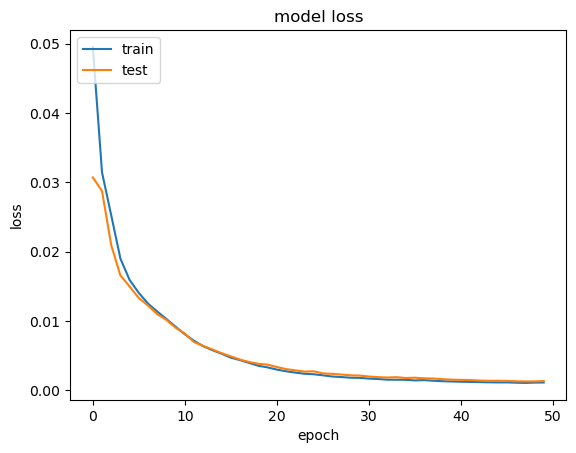

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Visualize the reconstructed inputs and the encoded representations for test images using Matplotlib.

In [14]:
# Encode and decode some images
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

5/5 [==============================] - 0s 14ms/step


In [15]:
encoded_imgs[1].shape

(50,)

In [16]:
decoded_imgs[1].shape

(49152,)

#### Plotting the orginal and Reconstructed images

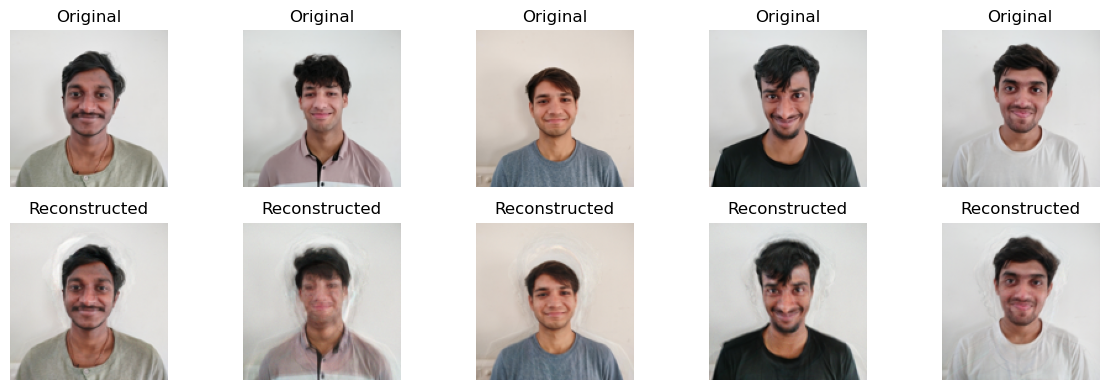

In [17]:
# Select random images from the test set
num_images = 5
random_indices = np.random.choice(range(len(X_test)), num_images, replace=False)
original_images = X_test[random_indices]
reconstructed_images = decoded_imgs[random_indices]

# Reshape the images for plotting
original_images = original_images.reshape((num_images, 128, 128, 3))
reconstructed_images = reconstructed_images.reshape((num_images, 128, 128, 3))

# Plot the original and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(12, 4))

# Plot original images
for i in range(num_images):
    axes[0, i].imshow(original_images[i])
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

# Plot reconstructed images
for i in range(num_images):
    axes[1, i].imshow(reconstructed_images[i])
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()


### Create a classification model based on the encoder

In [18]:
classification_input = Input(shape=(encoding_dim,))
classification_hidden = Dense(64, activation='relu')(classification_input)
classification_output = Dense(num_classes, activation='softmax')(classification_hidden)

classification_model = Model(classification_input, classification_output)



In [19]:
# Compiling the classification model
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
classification_history = classification_model.fit(encoded_imgs, y_test,
                                                  epochs=50,
                                                  batch_size=32,
                                                  shuffle=True,
                                                  validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 80ms/step - loss: 36.7613 - accuracy: 0.0261 - val_loss: 33.2590 - val_accuracy: 0.0345
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 25.7080 - accuracy: 0.0783 - val_loss: 27.2126 - val_accuracy: 0.1034
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 20.2676 - accuracy: 0.2348 - val_loss: 24.2075 - val_accuracy: 0.0690
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 17.2152 - accuracy: 0.2522 - val_loss: 21.1647 - val_accuracy: 0.0690
Epoch 5/50
4/4 [==============================] - 0s 21ms/step - loss: 14.6881 - accuracy: 0.2522 - val_loss: 17.9403 - val_accuracy: 0.0690
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 12.1747 - accuracy: 0.2696 - val_loss: 15.0336 - val_accuracy: 0.0690
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 9.9536 - accuracy: 0.3304 - val_loss: 12.3472 - val_accuracy: 0.0690
Epoch 8/50
4/4

In [21]:
# Evaluate the classification model
classification_loss, classification_accuracy = classification_model.evaluate(encoded_imgs, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 1.0000


#### Plotting the training and validation loss

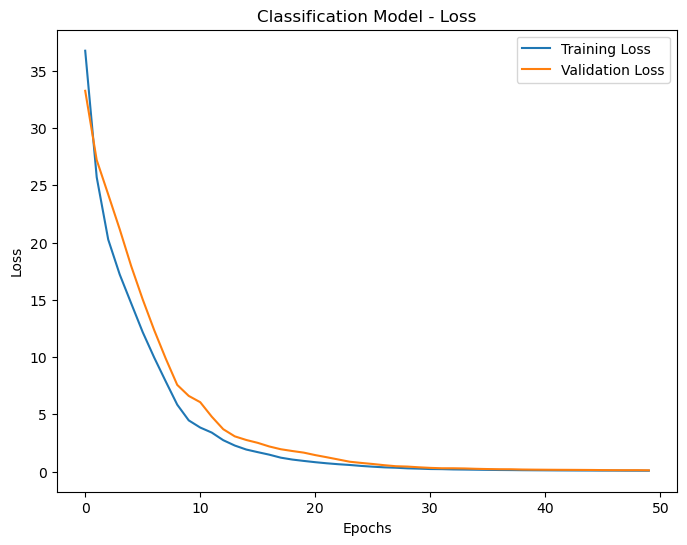

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(classification_history.history['loss'], label='Training Loss')
plt.plot(classification_history.history['val_loss'], label='Validation Loss')
plt.title('Classification Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

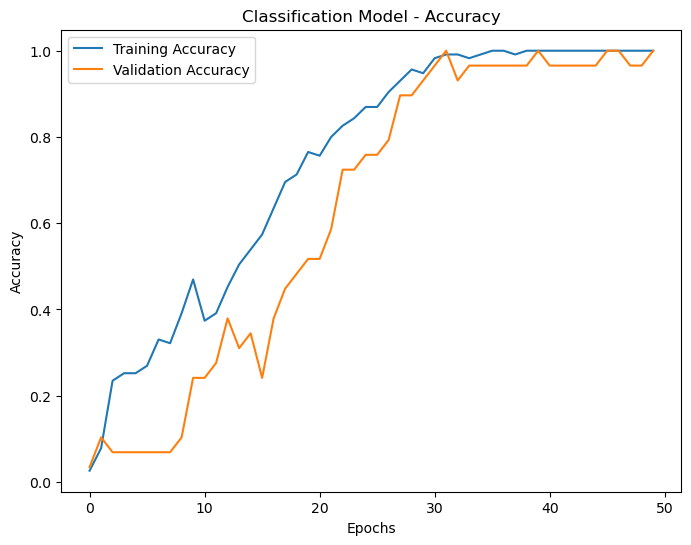

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(classification_history.history['accuracy'], label='Training Accuracy')
plt.plot(classification_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### classification accuracy

In [24]:

print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 1.0


#### Predict labels using the classification model

In [25]:
predicted_labels = classification_model.predict(encoded_imgs)
predicted_labels =  np.argmax(predicted_labels, axis=1)

5/5 [==============================] - 0s 0s/step


#### plotting the original and predicted labels

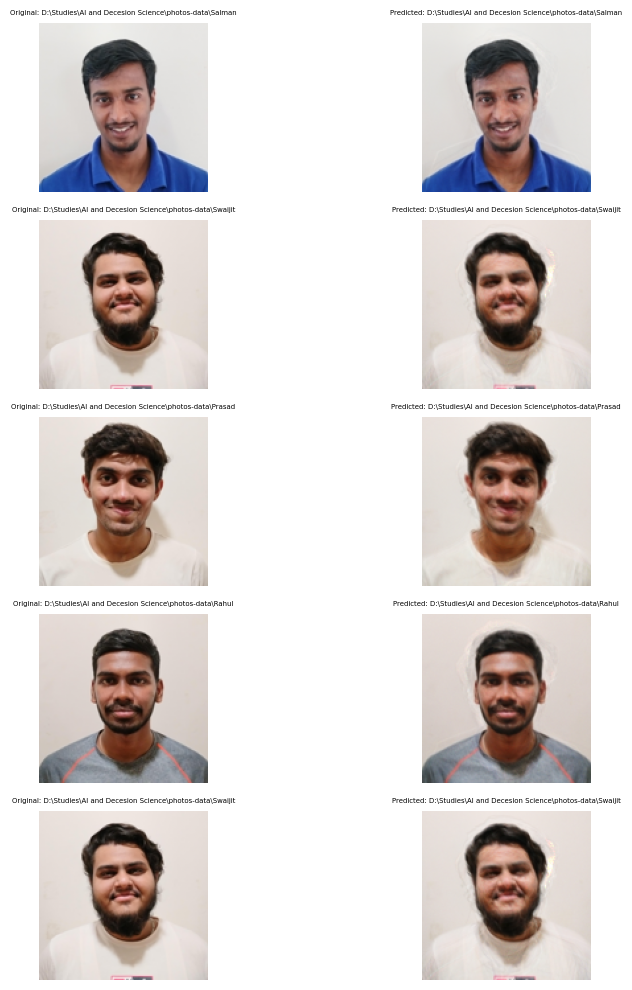

In [26]:
# Selecting random images from the test set
num_images = 5
random_indices = np.random.choice(range(len(X_test)), num_images, replace=False)
original_images = X_test[random_indices]
predicted_classes = predicted_labels[random_indices]
predicted_images = decoded_imgs[random_indices]

# Reshaping the images for plotting
original_images = original_images.reshape((num_images, 128, 128, 3))
predicted_images = predicted_images.reshape((num_images, 128, 128, 3))

# Plotting the original and predicted images with labels
fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 10))

for i in range(num_images):
    axes[i, 0].imshow(original_images[i])
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Original: {class_labels[y_test[random_indices[i]]]}', fontsize=5)

    axes[i, 1].imshow(predicted_images[i])
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Predicted: {class_labels[predicted_classes[i]]}', fontsize=5)

plt.tight_layout()
plt.show()


1) Labels are predicted correctly for every person in the class